In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import timm
root = "/Users/zyxu/Documents/py/FM_weights"
os.chdir(root)
from utils import visz_pca_pos_cvec

/Users/zyxu/opt/anaconda3/envs/py39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model_mapping = {
  "vit_small_in1k": "vit_small_patch16_224.augreg_in1k",
  "vit_small_in21k": "vit_small_patch16_224.augreg_in21k_ft_in1k",
  "vit_tiny_in21k": "vit_tiny_patch16_224.augreg_in21k",
  "vit_tiny_patch16_384_in21k": "vit_tiny_patch16_384_in21k"
}

In [4]:
# download to file to below path from https://drive.google.com/drive/folders/12DS8b2vcWncRZVDUZlQPdJCDB6Adzhyc?usp=sharing

model_name = "vit_small_in1k"
loaded_tensor = torch.load(f'{root}/output/{model_name}/37_4sets_intermediate_outputs.pth')
print(loaded_tensor.shape)

torch.Size([13, 256, 197, 384])


In [5]:
from utils import intermdiates_to_pos_ctx
res = intermdiates_to_pos_ctx(loaded_tensor, normalize = False)
res.keys()

mu.shape torch.Size([13, 384])
expanded_mu_pos:  torch.Size([13, 197, 384])
expanded_mu_ctx:  torch.Size([13, 256, 384])
expanded_pos: torch.Size([13, 256, 197, 384]), expanded_ctx: torch.Size([13, 256, 197, 384]), expanded_mu_whole: torch.Size([13, 256, 197, 384])
resid: torch.Size([13, 256, 197, 384])
cvec: torch.Size([13, 256, 197, 384])


dict_keys(['mu', 'pos', 'ctx', 'resid', 'cvec'])

In [6]:
D = loaded_tensor.shape[-1]
D

384

In [7]:
model = timm.create_model(f"timm/{model_mapping[model_name]}", img_size=224,pretrained=True)


# 2D

Layer progress: 100%|██████████| 12/12 [00:00<00:00, 88.10it/s]


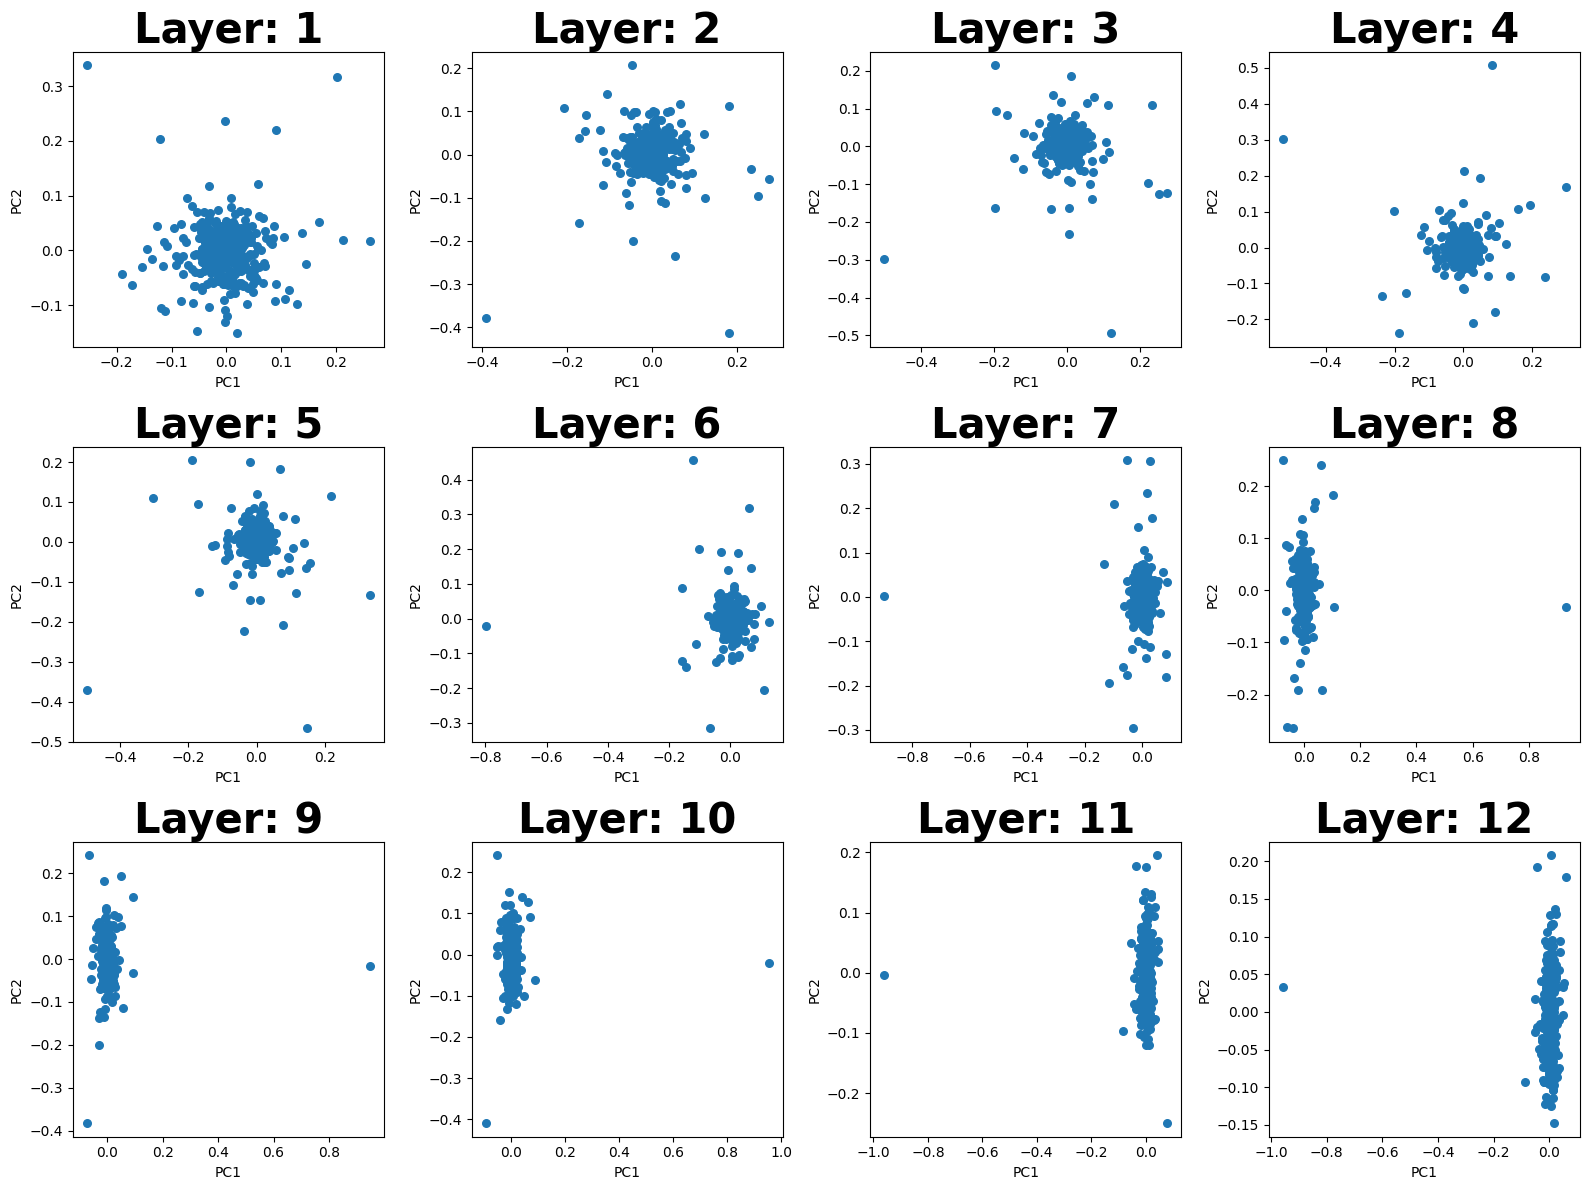

In [8]:
PC = visz_pca_pos_cvec.plot2D(res['pos'].detach(),point_size=30)

In [9]:
## PC is a dict, each key is a layer, store a array of shape [D,2] ([384, 2]), which is first 2 PCs' eigen vector
print("PC.keys(): ", PC.keys())
for key, val in PC.items():
    print(f"=== layer idx: {key} ===")
    print(val.shape)

PC.keys():  dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
=== layer idx: 1 ===
(384, 2)
=== layer idx: 2 ===
(384, 2)
=== layer idx: 3 ===
(384, 2)
=== layer idx: 4 ===
(384, 2)
=== layer idx: 5 ===
(384, 2)
=== layer idx: 6 ===
(384, 2)
=== layer idx: 7 ===
(384, 2)
=== layer idx: 8 ===
(384, 2)
=== layer idx: 9 ===
(384, 2)
=== layer idx: 10 ===
(384, 2)
=== layer idx: 11 ===
(384, 2)
=== layer idx: 12 ===
(384, 2)


In [12]:
# find outlier indices for PCs
out_indices = {}
for i in range(1,13):
    print(f"=== layer {i}  ===")
    pc = PC[i]
    mean = np.mean(pc, axis = 0)
    # print("mean: ", mean)
    distances = np.sqrt(np.sum((pc - mean) ** 2, axis=1))
    # Sort the distances and get the indices of the two largest
    sorted_indices = np.argsort(distances)  # Sorts in ascending order

    outliers = sorted_indices[-2:]  # Take the last a few indices for the most extreme values
    print(outliers)
    out_indices[i] = outliers

=== layer 1  ===
[ 72 358]
=== layer 2  ===
[ 72 358]
=== layer 3  ===
[ 72 358]
=== layer 4  ===
[ 72 358]
=== layer 5  ===
[ 72 358]
=== layer 6  ===
[358 148]
=== layer 7  ===
[358 148]
=== layer 8  ===
[218 148]
=== layer 9  ===
[218 148]
=== layer 10  ===
[218 148]
=== layer 11  ===
[218 148]
=== layer 12  ===
[332 148]


Below is the visualization of Layer Norm. 
- para_option = ["weight, "bias"]:  which parameter to print
- norm_option = ["attention", "mlp"]: which LN to print
- indices: add red dashed lines based on indices

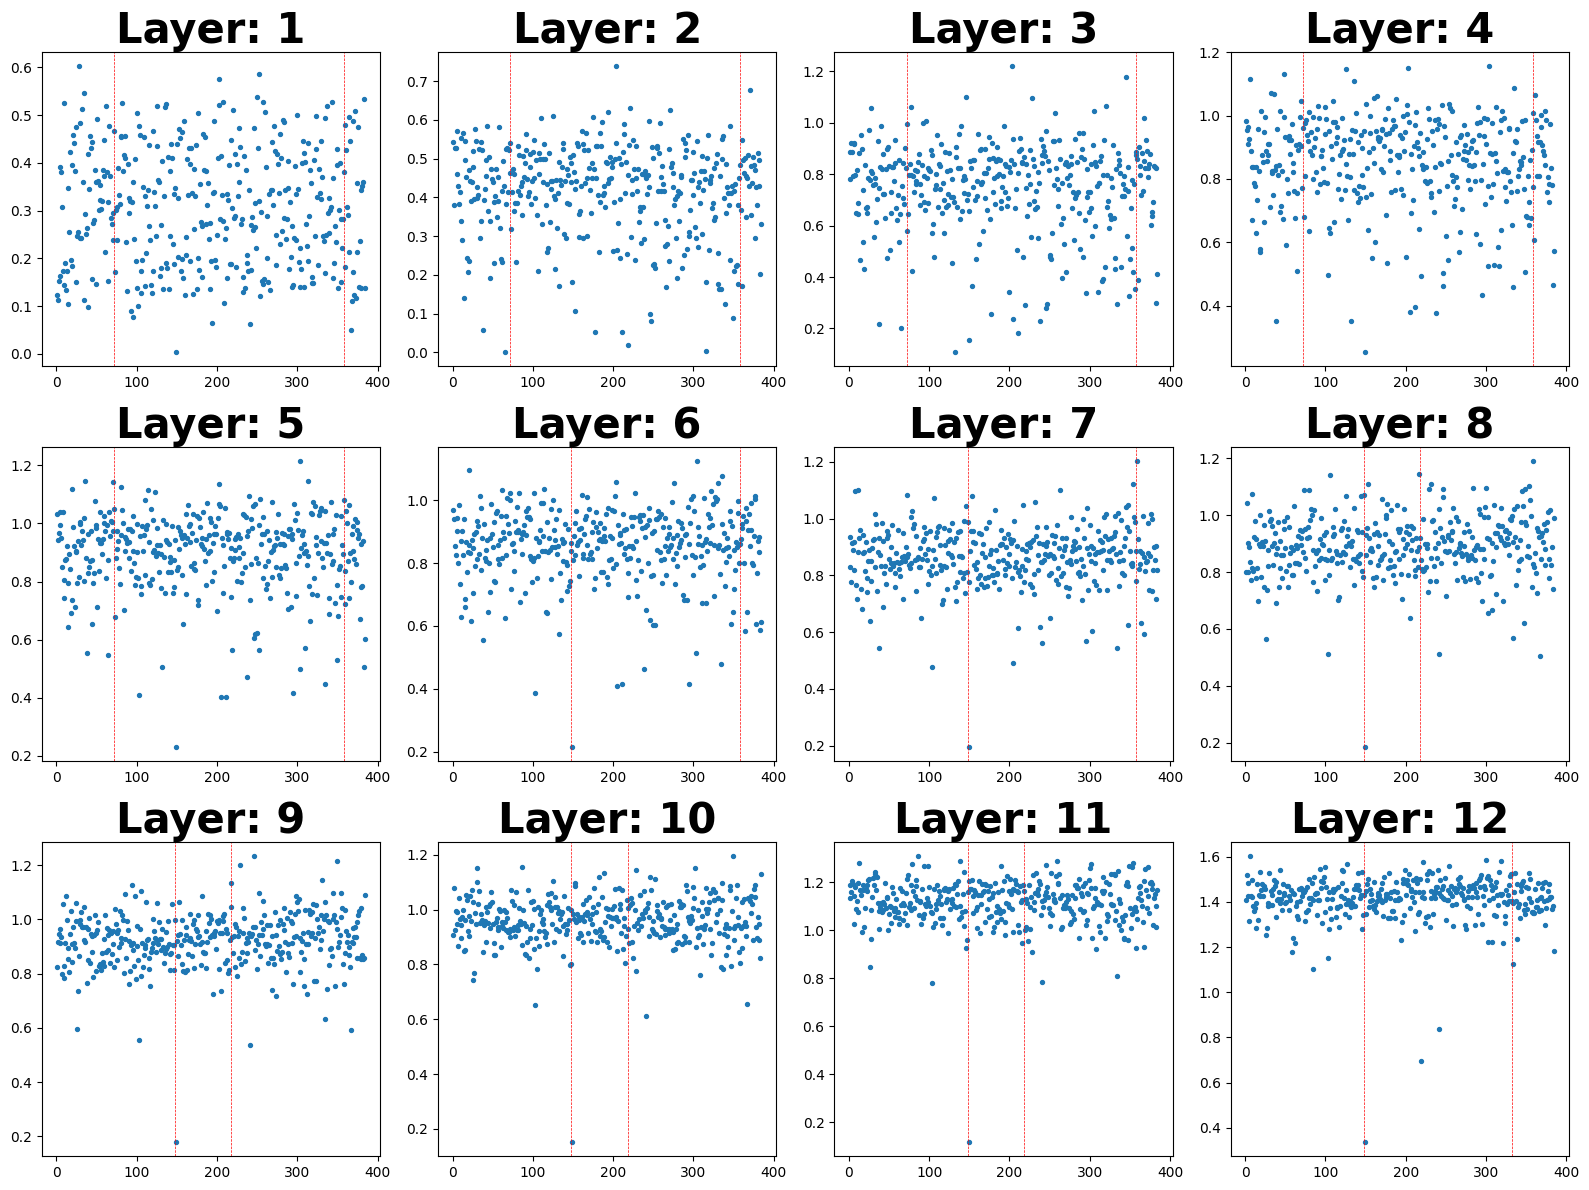

In [15]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, para_option="weight", norm_option = "attention", indices=out_indices, add_vlines=False)


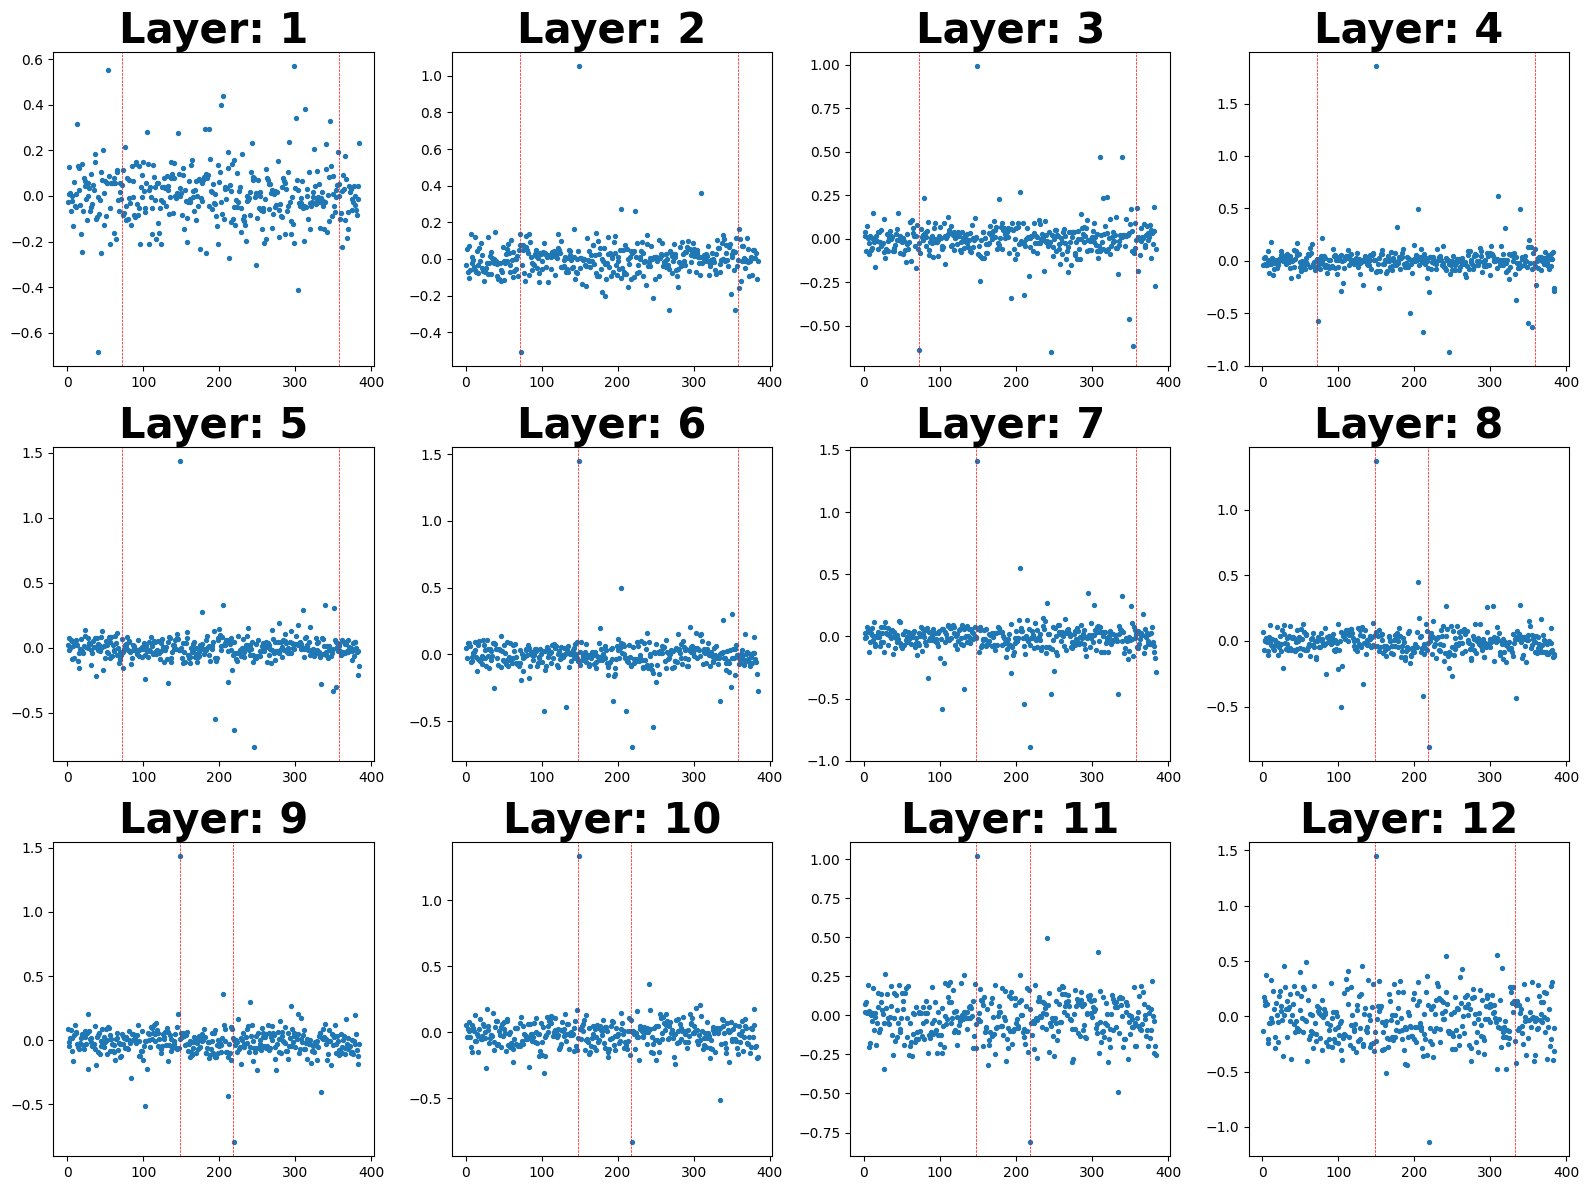

In [17]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, para_option="bias", norm_option = "attention", indices=out_indices, add_vlines=False)


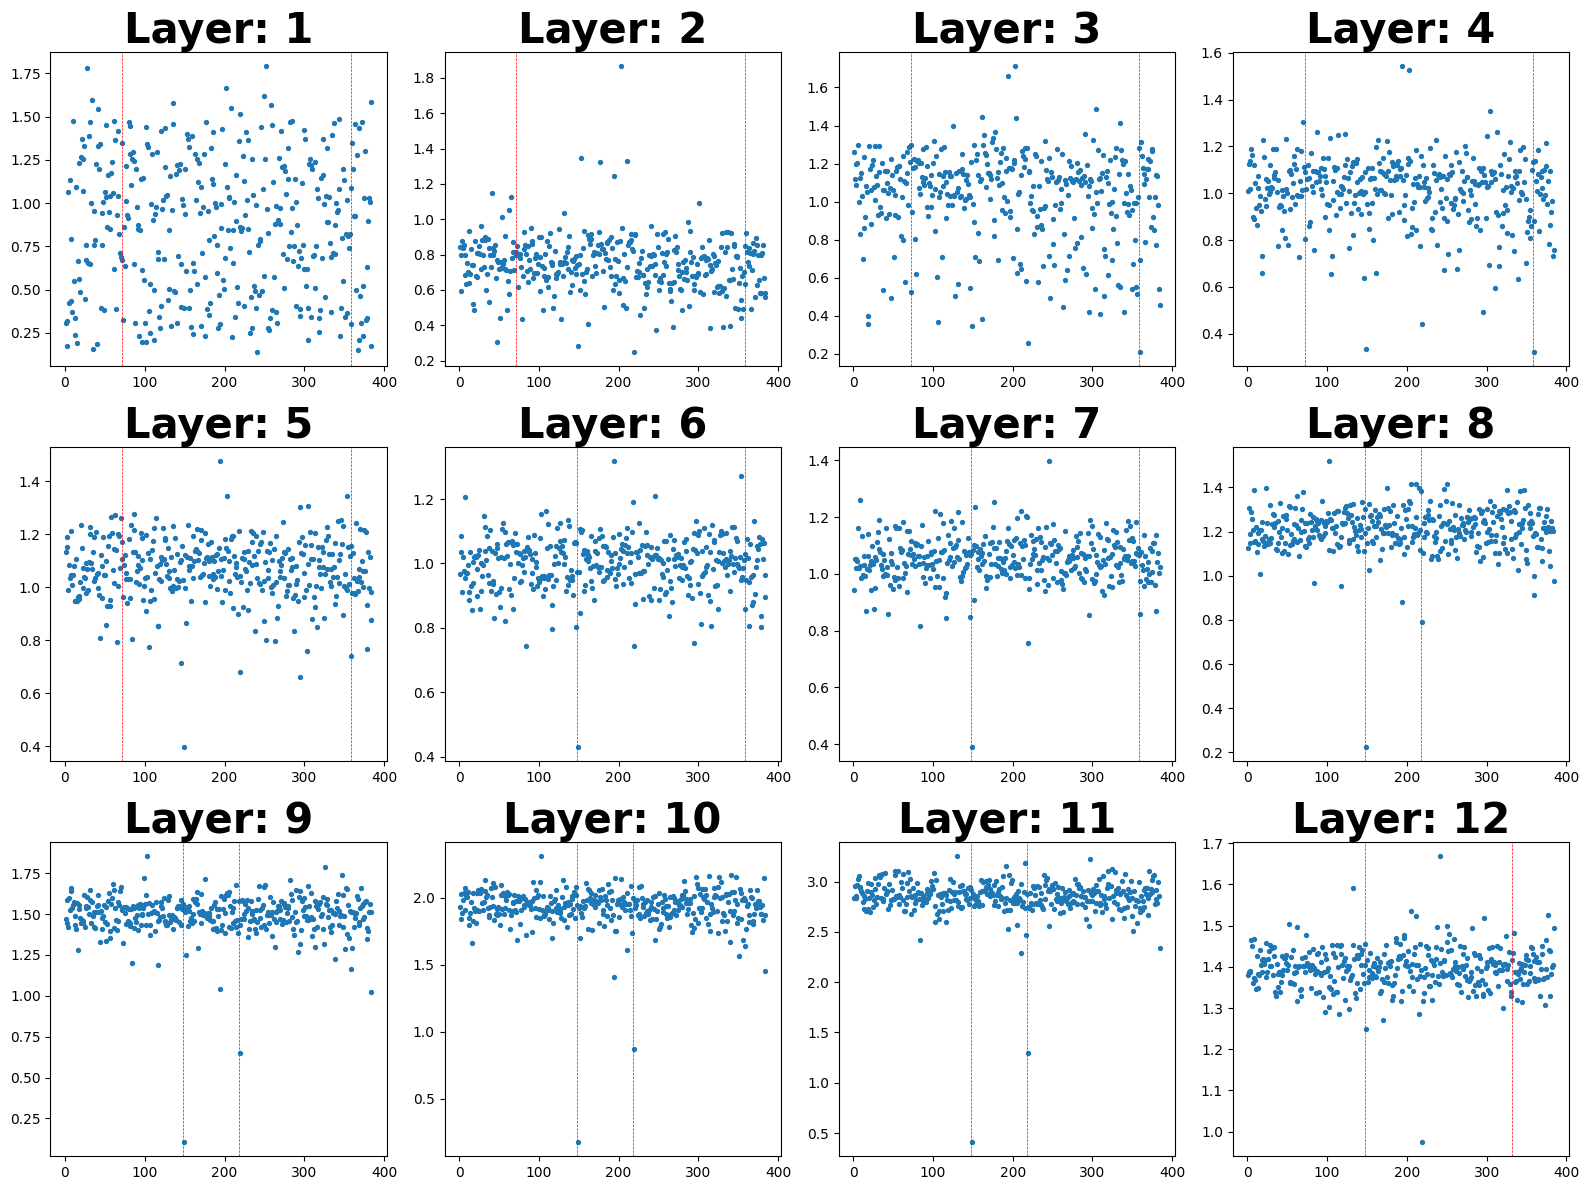

In [18]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, para_option="weight", norm_option = "mlp", indices=out_indices, add_vlines=False)



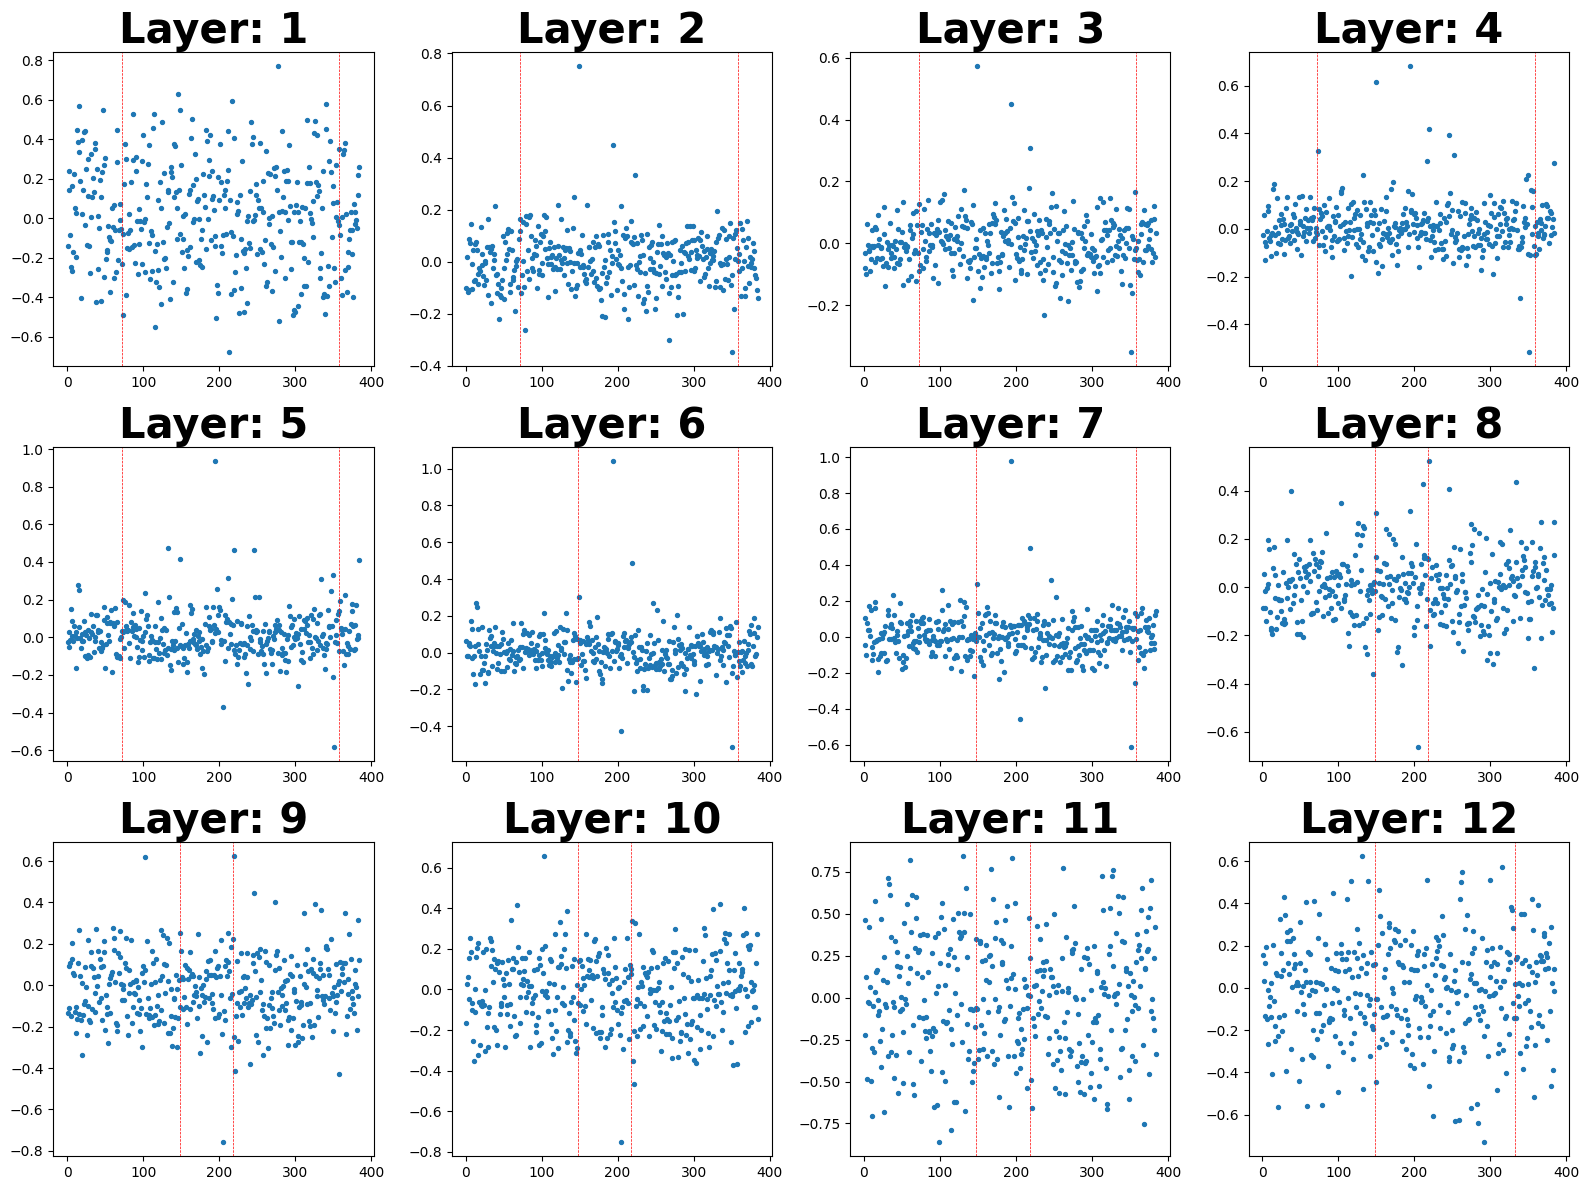

In [19]:
weight, bias = visz_pca_pos_cvec.plotLayerNorm(model, para_option="bias", norm_option = "mlp", indices=out_indices, add_vlines=False)

